In [11]:
import sys
import os
import pandas as pd
import warnings

In [12]:
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)

In [13]:
# Aller au dossier racine du projet
project_root = os.path.abspath("..")  # Remonte au dossier principal du projet
src_path = os.path.join(project_root, "src")

# Ajouter le chemin src/ au path Python (évite les doublons)
if src_path not in sys.path:
    sys.path.append(src_path)

In [14]:
from ml_models.pipeline import run_model

df_stats = run_model('catboost',use_feature_engineering=True)

<class 'pandas.core.frame.DataFrame'>
Index: 63531 entries, 0 to 5077
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   venue                63531 non-null  category
 1   config               63531 non-null  category
 2   surface              63531 non-null  category
 3   distance             63531 non-null  category
 4   going                63531 non-null  category
 5   horse_ratings        63531 non-null  category
 6   race_class           63531 non-null  category
 7   horse_age            63531 non-null  int64   
 8   horse_country        63531 non-null  category
 9   horse_type           63531 non-null  category
 10  horse_rating         63531 non-null  category
 11  horse_gear           63531 non-null  category
 12  declared_weight      63531 non-null  float64 
 13  actual_weight        63531 non-null  int64   
 14  draw                 63531 non-null  int64   
 15  win_odds             6353

In [15]:
df_stats = df_stats.reset_index()
df_stats

,race_id,horse_id,won,y_predict,top_prediction,accuracy
0,5078,976,0,0.053531,0,False
1,5078,1598,0,0.001823,0,False
2,5078,1514,0,0.062835,0,False
3,5078,3673,0,0.023089,0,False
4,5078,627,1,0.155230,0,False
...,...,...,...,...,...,...
15911,6348,1238,0,-0.005960,0,False
15912,6348,985,0,0.009635,0,False
15913,6348,3147,0,0.007993,0,False
15914,6348,1982,0,0.182701,0,False


## Winning strategies

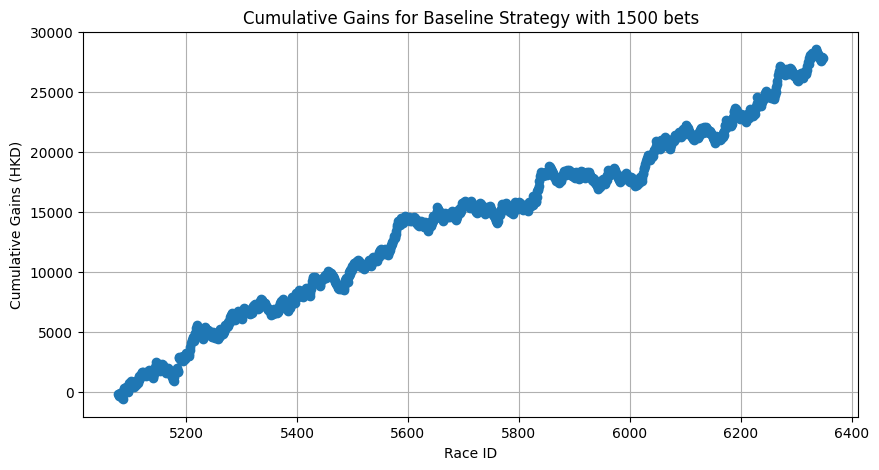

In [16]:
from data_processing.preprocess_data import fetch_winning_dividends
from investment_strategies.baseline_strategy import baseline_strategy
from visualization.plot_results import plot_cumulative_gains 

for i in [1500]:
    df = fetch_winning_dividends(df_stats)
    df = baseline_strategy(df, 100, i)
    plot_cumulative_gains(df, i, "Baseline Strategy")

au hasard

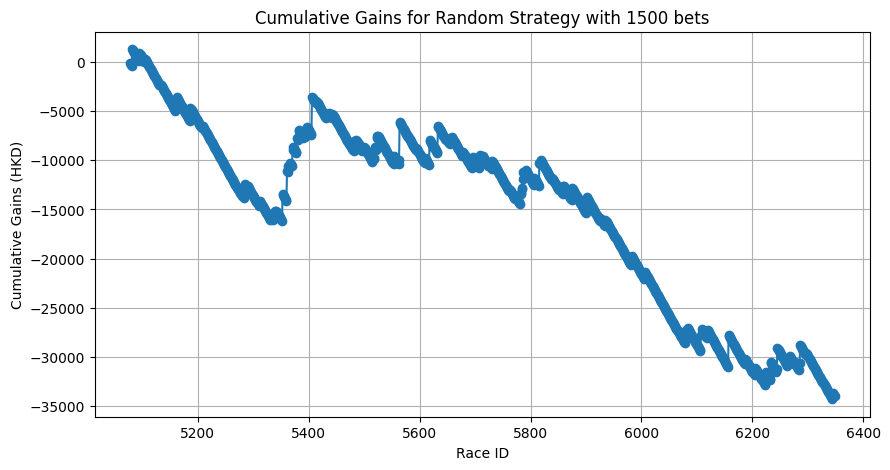

In [17]:
from investment_strategies.random_strategy import random_strategy

for i in [1500]:
    df = fetch_winning_dividends(df_stats)
    df = random_strategy(df, 100, i)

    plot_cumulative_gains(df, i, "Random Strategy")

critère de kelly

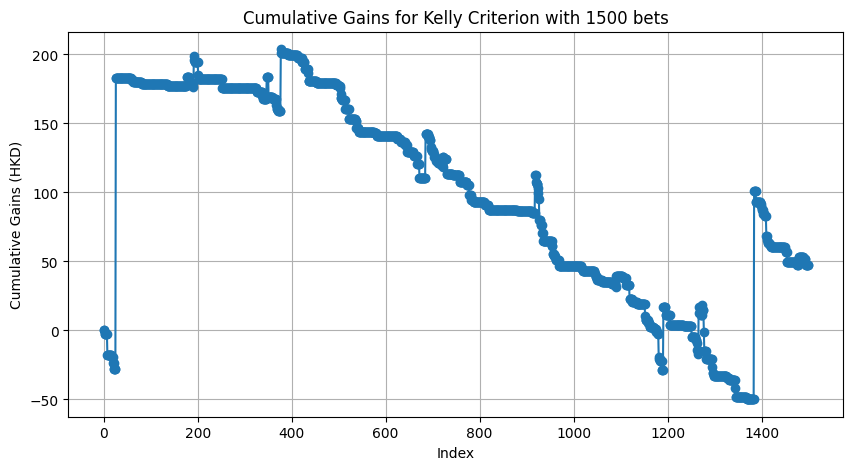

In [18]:
from data_processing.preprocess_data import fetch_winning_dividends_per_prediction
from investment_strategies.Kelly_criterion import kelly_criterion
from visualization.plot_results import plot_cumulative_gains_per_horse

for i in [1500]:
    df = fetch_winning_dividends_per_prediction(df_stats)
    df = kelly_criterion(df, 100, i, 0.01,calibrate_probabilities=False, single_bet_per_race=False)
    plot_cumulative_gains_per_horse(df, i, "Kelly Criterion")

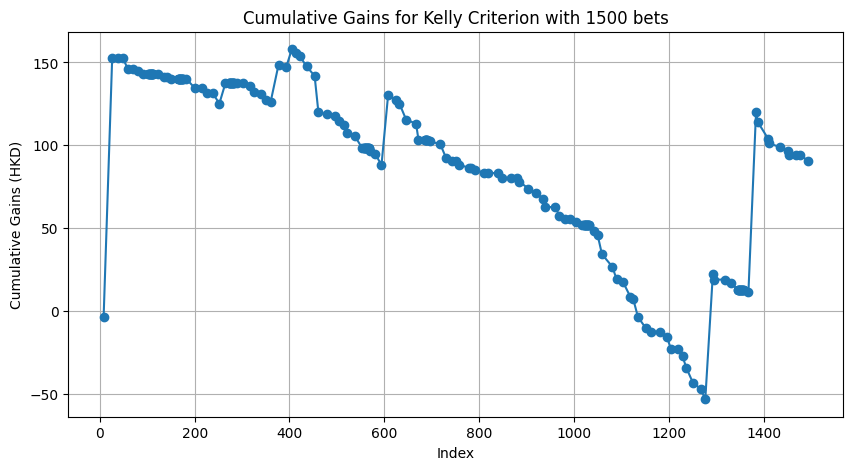

In [19]:
for i in [1500]:
    df = fetch_winning_dividends_per_prediction(df_stats)
    df = kelly_criterion(df, 100, i, 0.01,calibrate_probabilities=True, single_bet_per_race=True)
    plot_cumulative_gains_per_horse(df, i, "Kelly Criterion")

Kelly fonctionne moins bien car Kelly récompense l'utilisateur si la probabilité de victoire de chaque cheval est vraiment pertinente, donc elle nécessite une précision quanti dingue car elle fonde le montant à parier sur cette proba.

critère de thorp & zembia

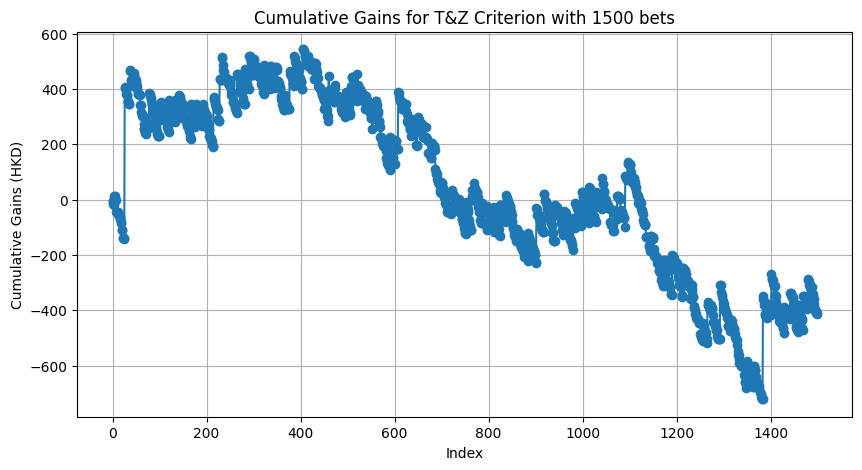

,race_id,horse_id,won,y_predict,win_dividend1,win_odds,num_horses,bet_fraction,bet_amount,gains,cumulative_gains
0,5078,976,0,0.053531,4.40,15.0,14,0.055544,5.554430,-5.554430,-5.554430
1,5078,1598,0,0.001823,4.40,99.0,14,0.000000,0.000000,-0.000000,-5.554430
2,5078,1514,0,0.062835,4.40,25.0,14,0.108060,10.805971,-10.805971,-16.360401
3,5078,3673,0,0.023089,4.40,34.0,14,0.024660,2.466041,-2.466041,-18.826442
4,5078,627,1,0.155230,4.40,4.4,14,0.075088,7.508756,33.038527,14.212085
...,...,...,...,...,...,...,...,...,...,...,...
1495,5196,459,0,0.070738,13.55,12.0,12,0.073073,7.307340,-7.307340,-403.707481
1496,5196,4307,0,-0.002456,13.55,99.0,12,0.000000,0.000000,-0.000000,-403.707481
1497,5196,3525,0,0.066827,13.55,11.0,12,0.055065,5.506534,-5.506534,-409.214015
1498,5196,4275,0,0.007991,13.55,67.0,12,0.000000,0.000000,-0.000000,-409.214015


In [20]:
from data_processing.preprocess_data import fetch_winning_dividends_per_prediction
from investment_strategies.thorp_zembia_criterion import thorp_zembia_criterion 
from visualization.plot_results import plot_cumulative_gains_per_horse

for i in [1500]:
    df = fetch_winning_dividends_per_prediction(df_stats)
    df = thorp_zembia_criterion(df, 100, i, min_kelly=0.01)
    plot_cumulative_gains_per_horse(df, i, "T&Z Criterion")
df


Pareil, si mon modèle est pas opti, il y aura trop de différences entre le y_predict et les odds, donc l'optimisation quanti va mal se faire

## Model finetuning

Feature importance analysis